# Behavioral Cloning

## Training Data

Initially I will consider the sample training data that was provided. Let's explore the data a little bit.

In [28]:
import glob
import matplotlib.pyplot as plt
import pandas as pd 
import cv2
import matplotlib.image as mpimg

images = glob.glob('../BehaviorSample/IMG/*jpg')

print("Number of images: ", len(images))

Number of images:  24108


In [29]:
data = pd.read_csv("../BehaviorSample/driving_log.csv") 
data.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [30]:
# Number of rows

print("Number of data rows: ", data.shape[0])

print("Number of image paths: ", data.shape[0]*3)


Number of data rows:  8036
Number of image paths:  24108


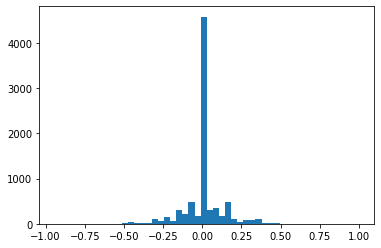

In [31]:
n, bins, patches = plt.hist(data["steering"], 50)

The data is very unbalanced. Most of frames are going straight. I'll augment this in a couple of ways:

1. We will use the left and right cameras and adjust the steering angles using the center frame at the same timestamps.

2. We will also flip the images to double our data set.

#### Resizing, Cropping, and Changing the Color Space

I'll use the opencv imread function therefore I'll change the color channel ordering. In addition to that I'll crop the center of the images because the hood of the car and the sky is not helpful for steering the vehicle.

The same crop & resize operation is also applied during inference in drive.py.

Here is a sample before preparation operations.

In [41]:
def crop(image):
    return image[60:130, :]

def resize(image, shape=(160, 70)):
    return cv2.resize(image, shape)

def fullPath(imgPath): 
    return "../BehaviorSample/IMG/" + imgPath.split('/')[1]

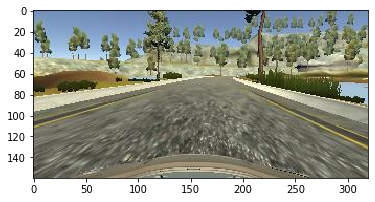

In [42]:
img = mpimg.imread(fullPath(data['center'][1000]))

plt.imshow(img)

After cropping and resizing

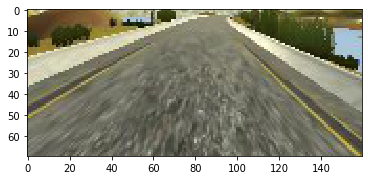

In [43]:
plt.imshow(resize(crop(img)))

Here is how the same image would look after flipping.

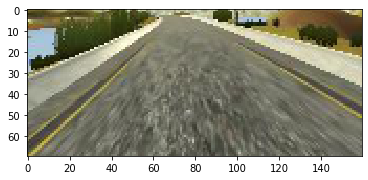

In [40]:
plt.imshow(np.fliplr(resize(crop(img))))

### Training and Data Generator

For training in batches efficiently, I implemented a data generator using keras.utils.Sequence.

See code/data.py for the augmentation and data generator code.

The benefit of taking this approach is that we can augment the data on the fly as batches are constructed. Hence, I don't need to save extra images on disk or use extra memory for the augmented images beyond what is necessary for the batch. With a generator we can also construct the batches on CPU an use GPU for training. 

### Model Architecture

I followed the architecture proposed by NVIDIA. https://devblogs.nvidia.com/deep-learning-self-driving-cars/

<img src="cnn-architecture-624x890.png">